In [1]:
import os 
import torch
import random
from diffusers import StableDiffusionXLPipeline
from safetensors.torch import load_file
from copy import deepcopy
torch.enable_grad(False)

/share/u/rohit/.conda/envs/visdiff/lib/python3.10/site-packages/xformers/ops/fmha/flash.py:211: FutureWarning: `torch.library.impl_abstract` was renamed to `torch.library.register_fake`. Please use that instead; we will remove `torch.library.impl_abstract` in a future version of PyTorch.
  @torch.library.impl_abstract("xformers_flash::flash_fwd")
/share/u/rohit/.conda/envs/visdiff/lib/python3.10/site-packages/xformers/ops/fmha/flash.py:344: FutureWarning: `torch.library.impl_abstract` was renamed to `torch.library.register_fake`. Please use that instead; we will remove `torch.library.impl_abstract` in a future version of PyTorch.
  @torch.library.impl_abstract("xformers_flash::flash_bwd")


<function torch.utils._contextlib.context_decorator.<locals>.decorate_context>

In [2]:
torch_dtype = torch.bfloat16
device = 'cuda:0'
basemodel_id="stabilityai/stable-diffusion-xl-base-1.0"

pipe = StableDiffusionXLPipeline.from_pretrained(basemodel_id, torch_dtype=torch_dtype, use_safetensors=True).to(device)
original_weights = deepcopy(pipe.unet.state_dict())

# note - currently for SDXL we recommend to use either esd-x or esd-x-strict. esd-u is in experiemental phase
esd_weights = load_file("../esd-models/sdxl/esd-trumpet-from-trumpet-esdx.safetensors")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [6]:
num_inference_steps = 50
guidance_scale = 7
height=width=1024

  0%|          | 0/50 [00:00<?, ?it/s]

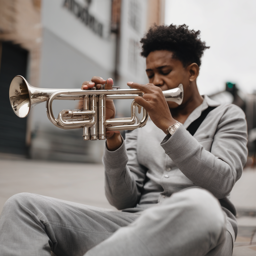

In [7]:
# Generate with original model
prompt = 'image of a person playing a trumpet'
seed = random.randint(0, 2**15)


pipe.unet.load_state_dict(original_weights, strict=False)
image = pipe(prompt, 
             num_inference_steps = num_inference_steps,
             guidance_scale= guidance_scale,
             height=height,
             width=width,
             generator=torch.Generator().manual_seed(seed)
            ).images
image[0].resize((256,256))

  0%|          | 0/50 [00:00<?, ?it/s]

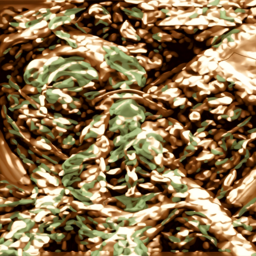

In [8]:
# Generate with ESD model
pipe.unet.load_state_dict(esd_weights, strict=False)
image = pipe(prompt, 
             num_inference_steps = num_inference_steps,
             guidance_scale= guidance_scale,
             height=height,
             width=width,
             generator=torch.Generator().manual_seed(seed)
            ).images
image[0].resize((256,256))